# Demo-9-Supermarket

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
sales = pd.read_csv('supermarket_sales.csv')
sales.sample(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
506,387-49-4215,B,Mandalay,Member,Female,Sports and travel,48.50,3,7.2750,152.7750,1/8/2019,12:50,Cash,145.50,4.761905,7.2750,6.7
579,207-73-1363,B,Mandalay,Normal,Male,Health and beauty,69.51,2,6.9510,145.9710,3/1/2019,12:15,Ewallet,139.02,4.761905,6.9510,8.1
826,222-42-0244,B,Mandalay,Member,Female,Health and beauty,72.11,9,32.4495,681.4395,1/28/2019,13:53,Credit card,648.99,4.761905,32.4495,7.7


In [46]:
sales.City.unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
sales.isin([np.inf, -np.inf, np.nan]).sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## Change to obj [‘Date’] to datetime [‘date’]

In [5]:
sales['date'] = pd.to_datetime(sales['Date'])

In [6]:
sales['date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: date, Length: 1000, dtype: datetime64[ns]

In [7]:
sales['date'].dtype

dtype('<M8[ns]')

In [8]:
sales['day'] = (sales['date']).dt.day
sales['month'] = (sales['date']).dt.month
sales['year'] = (sales['date']).dt.year

In [9]:
sales[['day','month','year']]

,day,month,year
0,5,1,2019
1,8,3,2019
2,3,3,2019
3,27,1,2019
4,8,2,2019
...,...,...,...
995,29,1,2019
996,2,3,2019
997,9,2,2019
998,22,2,2019


## Change the obj to datetime and classify as Hour

In [10]:
sales['Time'] = pd.to_datetime(sales['Time'], format="%H:%M")  # ie.:  format='%Y-%m-%d %H:%M:%S.%f'
sales['Hour'] = (sales['Time']).dt.hour

In [11]:
# the opening hour
sorted(sales['Hour'].unique())

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [12]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating,date,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,1900-01-01 15:24:41.879999744,307.58738,4.761905e+00,15.379369,6.97270,2019-02-14 00:05:45.600000,15.256000,1.993000,2019.0,14.910000
min,10.080000,1.000000,0.508500,10.678500,1900-01-01 10:00:00,10.17000,4.761905e+00,0.508500,4.00000,2019-01-01 00:00:00,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,1900-01-01 12:43:00,118.49750,4.761905e+00,5.924875,5.50000,2019-01-24 00:00:00,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,1900-01-01 15:19:00,241.76000,4.761905e+00,12.088000,7.00000,2019-02-13 00:00:00,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,1900-01-01 18:15:00,448.90500,4.761905e+00,22.445250,8.50000,2019-03-08 00:00:00,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,1900-01-01 20:59:00,993.00000,4.761905e+00,49.650000,10.00000,2019-03-30 00:00:00,31.000000,3.000000,2019.0,20.000000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858,NaN,8.693563,0.835254,0.0,3.186857


## Investigate the categorical columns

In [13]:
# the object columns
[col for col in sales.columns if sales[col].dtype == "object"]

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Payment']

In [14]:
print(f"{sales['Branch'].nunique()} of unique values in Branch: {sales['Branch'].unique().tolist()}")
print(f"{sales['City'].nunique()} of unique values in City: {sales['City'].unique().tolist()}")
print(f"{sales['Customer type'].nunique()} of unique values in Customer Type: {sales['Customer type'].unique().tolist()}")
print(f"{sales['Gender'].nunique()} of unique values in Gender: {sales['Gender'].unique().tolist()}")
print(f"{sales['Product line'].nunique()} of unique values in Product Line: {sales['Product line'].unique().tolist()}")
print(f"{sales['Payment'].nunique()} of unique values in Payment: {sales['Payment'].unique().tolist()}")

3 of unique values in Branch: ['A', 'C', 'B']
3 of unique values in City: ['Yangon', 'Naypyitaw', 'Mandalay']
2 of unique values in Customer Type: ['Member', 'Normal']
2 of unique values in Gender: ['Female', 'Male']
6 of unique values in Product Line: ['Health and beauty', 'Electronic accessories', 'Home and lifestyle', 'Sports and travel', 'Food and beverages', 'Fashion accessories']
3 of unique values in Payment: ['Ewallet', 'Cash', 'Credit card']


## Gender 

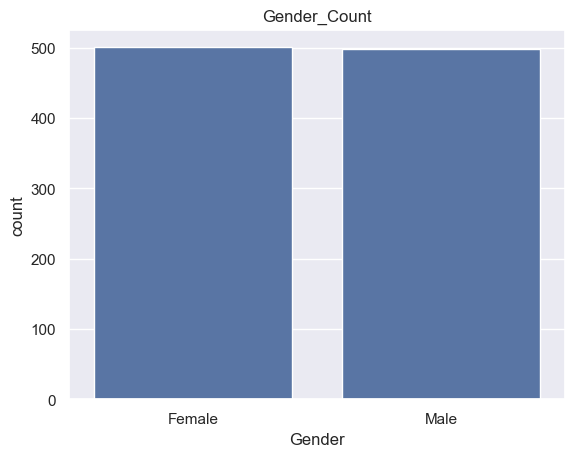

In [15]:
sns.set(style="darkgrid")       
genderCount  = sns.countplot(x="Gender", data =sales).set_title("Gender_Count")

In [16]:
# Female client
sales['Gender'].loc[sales['Gender']=='Female'].count()

501

In [17]:
# Male client
sales['Gender'].loc[sales['Gender']=='Male'].count()

499

## Branch ratings

Text(0.5, 1.0, 'Ratings by Branch')

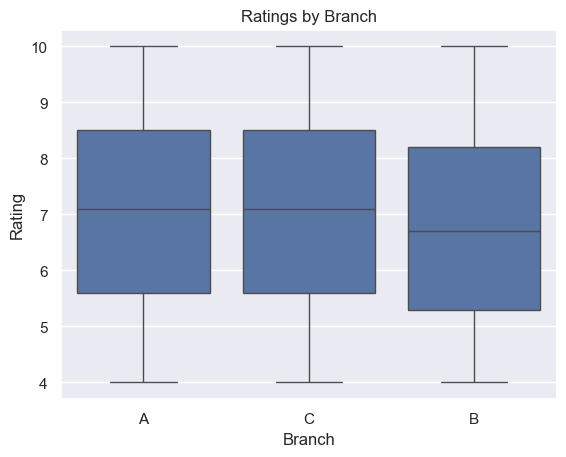

In [18]:
sns.boxplot(x="Branch", y = "Rating" ,data =sales).set_title("Ratings by Branch") 

## Product Sales per Hour

Text(0.5, 1.0, 'Product Sales per Hour')

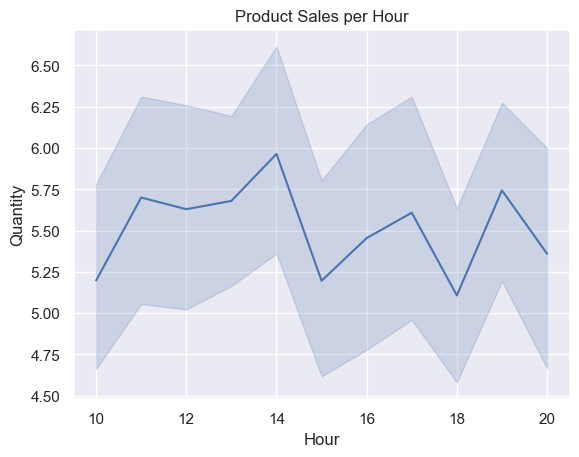

In [19]:
sns.lineplot(x="Hour",  y = 'Quantity',data =sales).set_title("Product Sales per Hour")

## Compare each branch sales quantity in 3 months

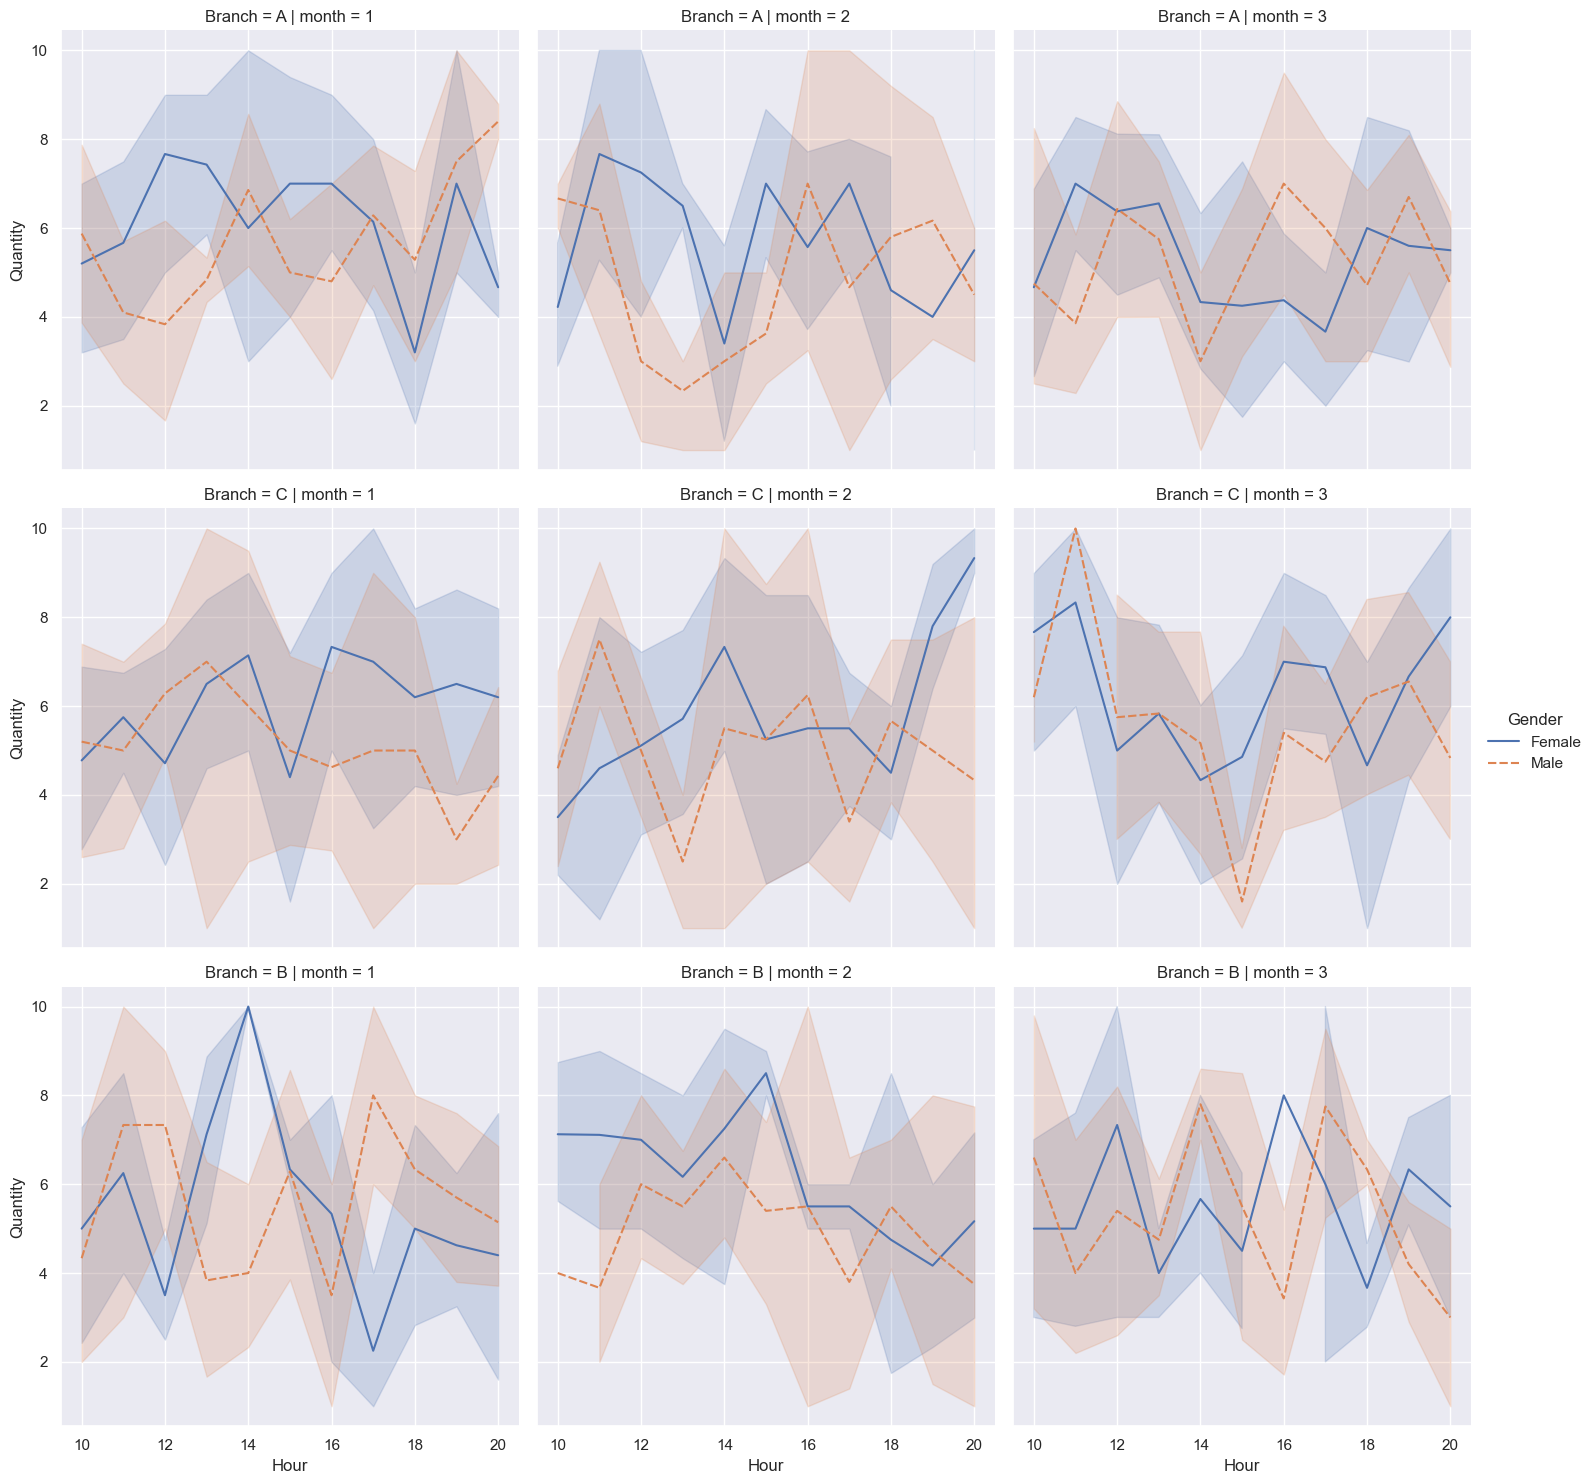

In [20]:
sns.relplot(x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch', 
            kind="line", hue="Gender", style="Gender", data =sales)

## Compare each branch sales amount in 3 months

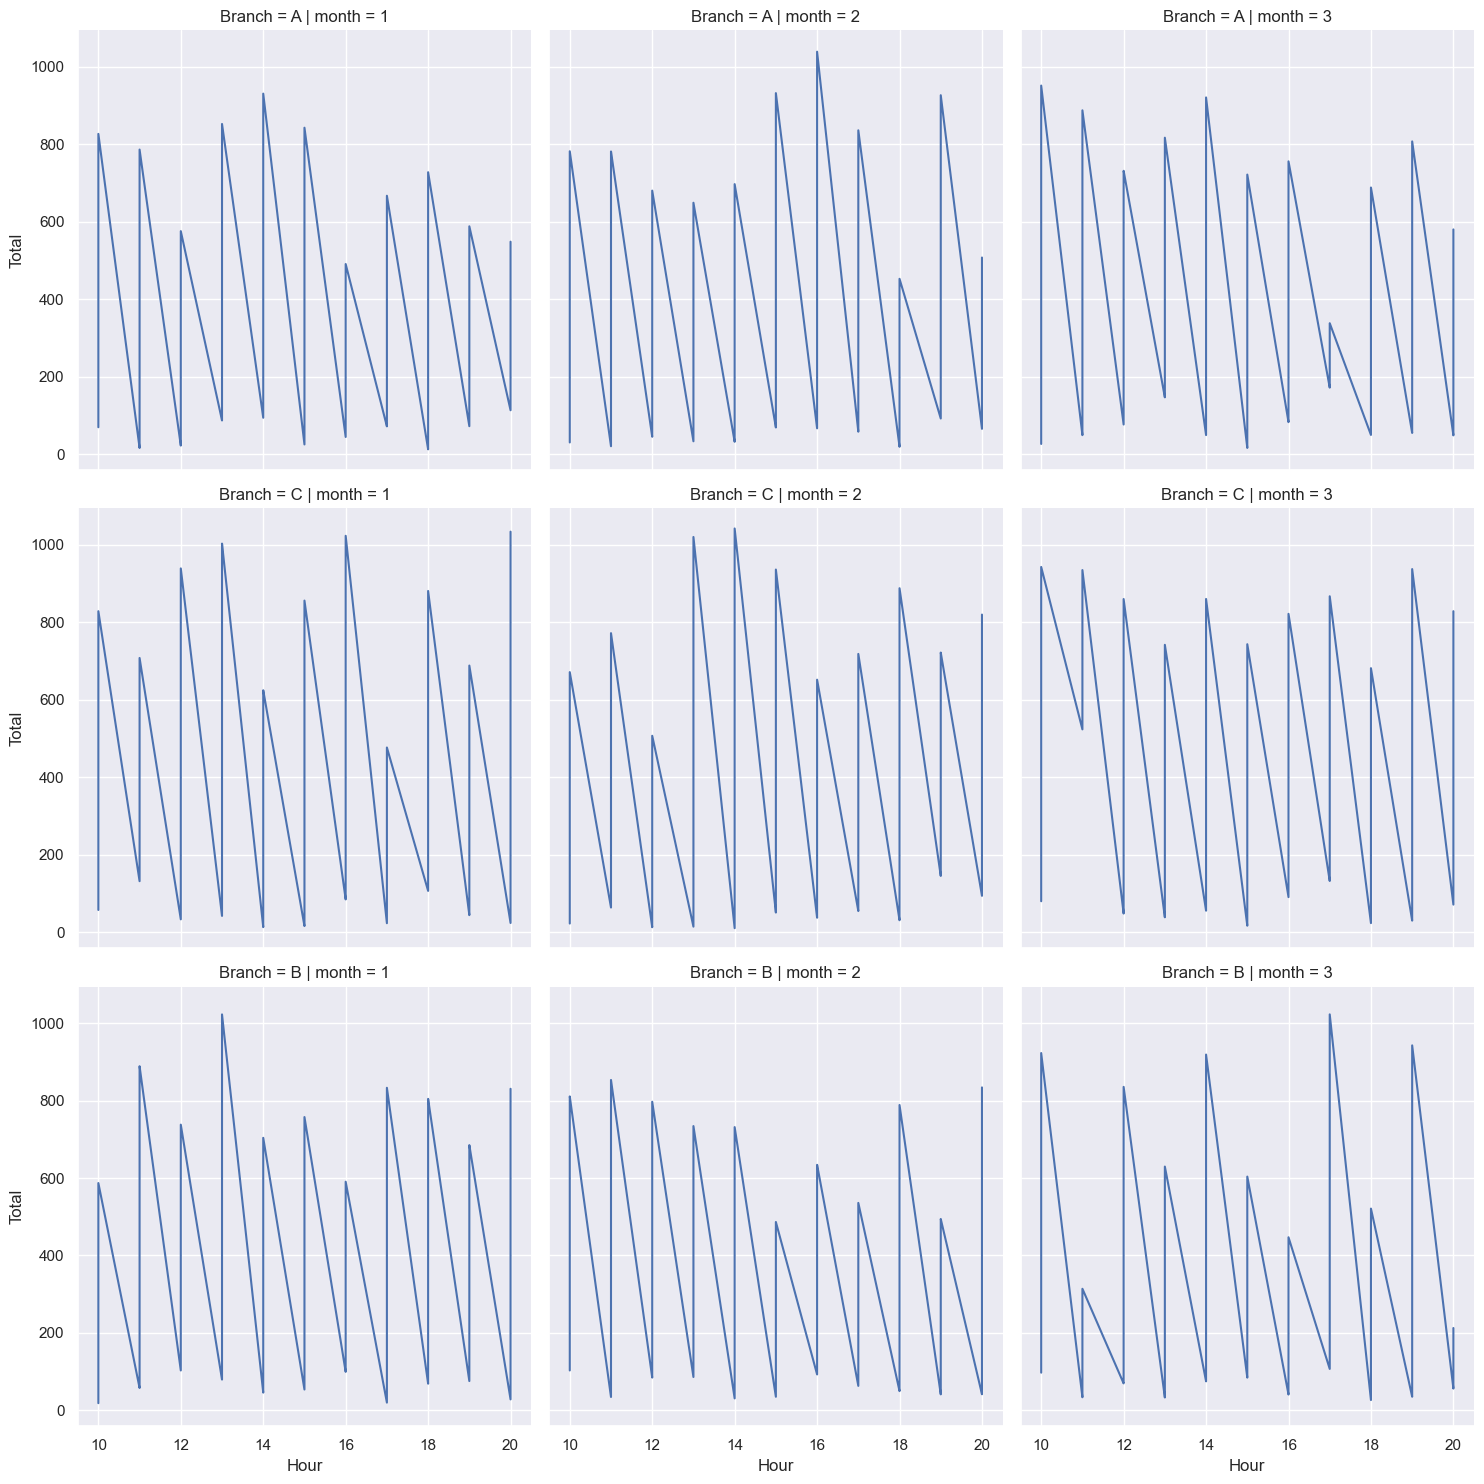

In [49]:
sns.relplot(x="Hour",  y = 'Total', col= 'month' , row= 'Branch', 
            estimator = None, kind="line", data =sales)

## Ratings vs Amount by gender

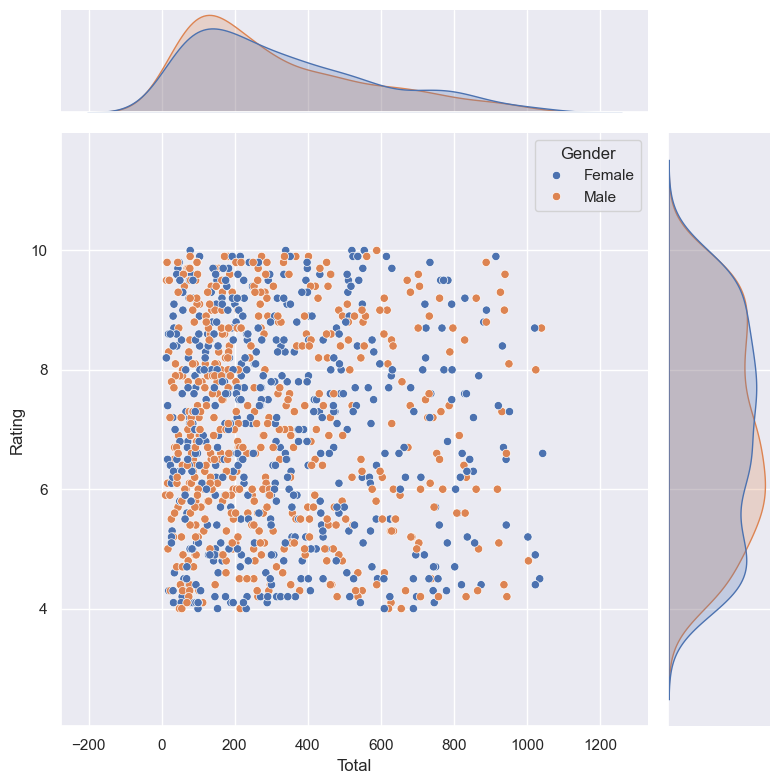

In [22]:
sns.jointplot(data =sales, x="Total", y = "Rating", hue="Gender",height=8 )

<Axes: xlabel='Rating', ylabel='Product line'>

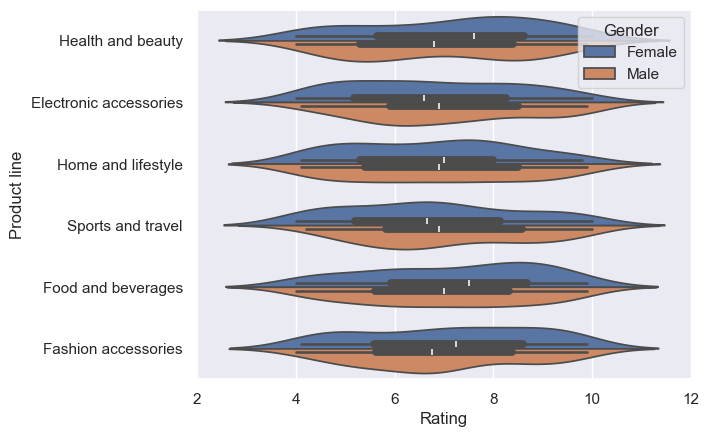

In [23]:
sns.violinplot( data=sales,y = 'Product line', x = 'Rating',
                hue = 'Gender',split=True)

In [24]:
sales['Rating'].loc[sales['Gender']=='Female'].mean()

6.964471057884231

In [25]:
sales['Rating'].loc[sales['Gender']=='Male'].mean()

6.980961923847695

## Product type vs Shopping quantity

<Axes: xlabel='Quantity', ylabel='Product line'>

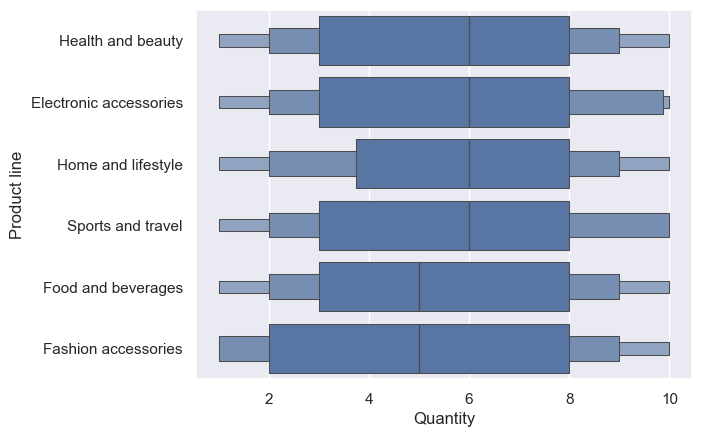

In [50]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=sales )

## Product line

<Axes: xlabel='count', ylabel='Product line'>

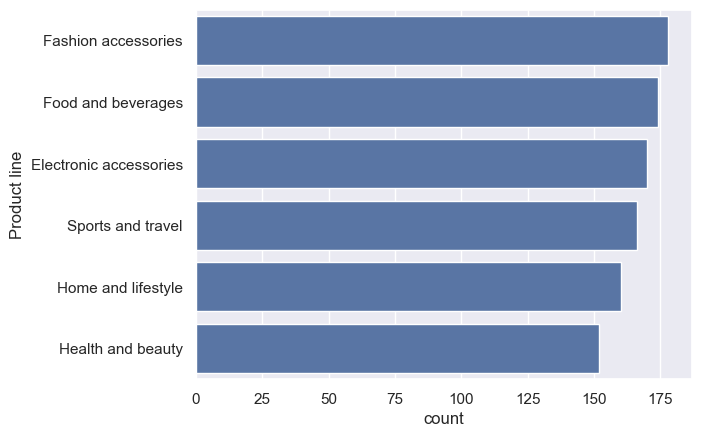

In [27]:
sns.countplot(y = 'Product line', data=sales, 
              order = sales['Product line'].value_counts().index )

## Product type vs Shopping Amount

<Axes: xlabel='Total', ylabel='Product line'>

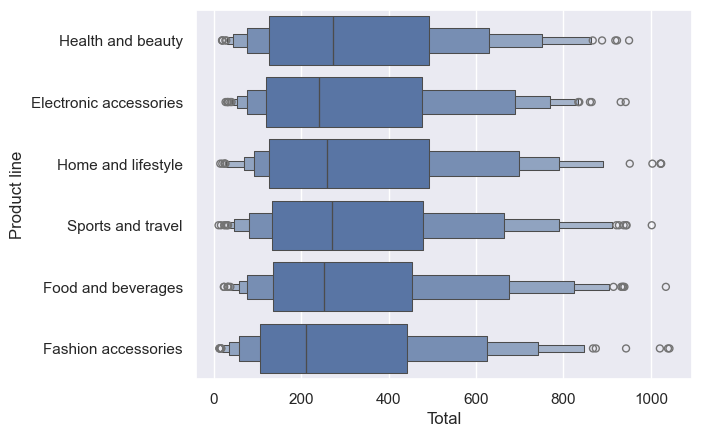

In [28]:
sns.boxenplot(y = 'Product line', x = 'Total', data=sales )

## Shopping amount vs Products on Gender

<Axes: xlabel='Total', ylabel='Product line'>

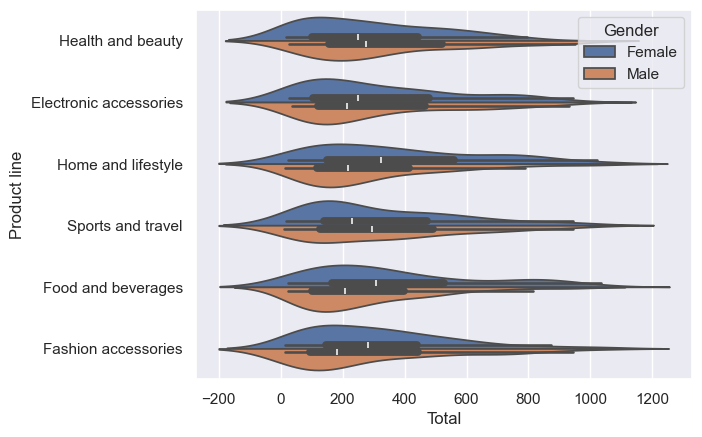

In [29]:
sns.violinplot( data=sales,y = 'Product line', x = 'Total',
                hue = 'Gender',split=True)

## Gross income on Product

<Axes: xlabel='gross income', ylabel='Product line'>

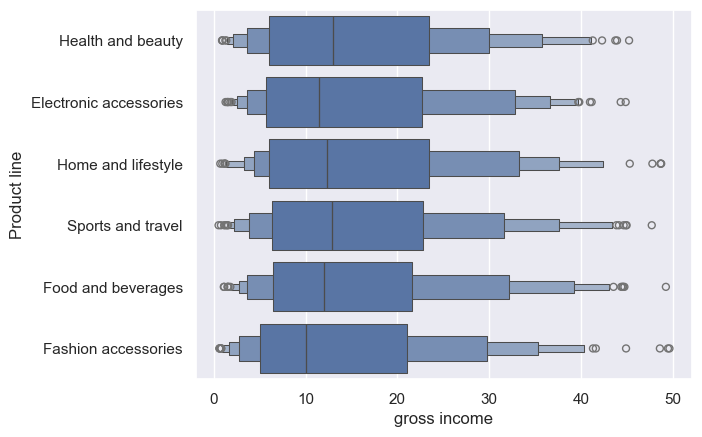

In [30]:
sns.boxenplot(y = 'Product line', x = 'gross income', data=sales )

## Product rating

<Axes: xlabel='Rating', ylabel='Product line'>

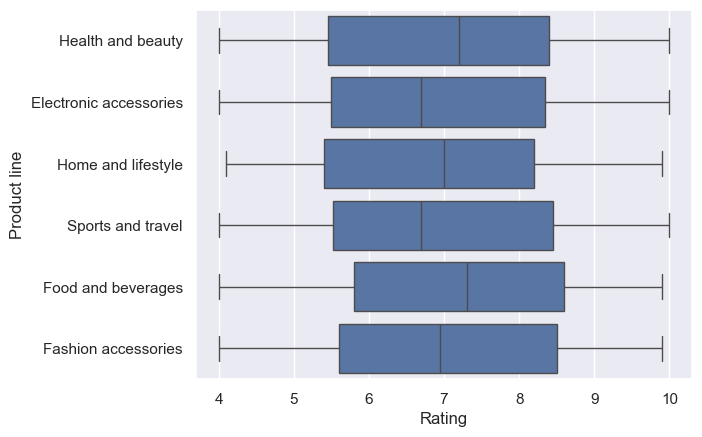

In [31]:
sns.boxplot(y = 'Product line', x = 'Rating', data=sales )

## Payment channel

Text(0.5, 1.0, 'Payment Channel')

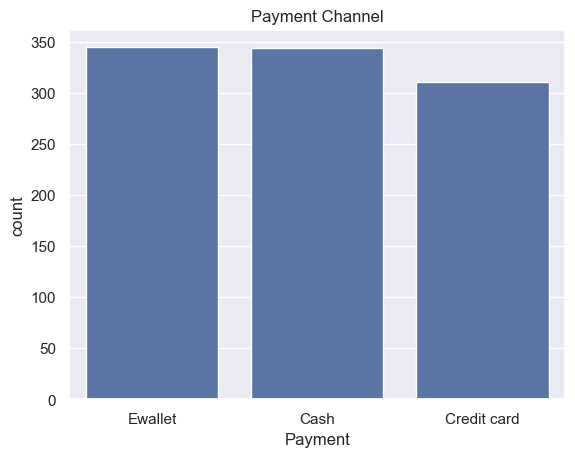

In [32]:
sns.countplot(x="Payment", data =sales).set_title("Payment Channel")

## Payment channel on each branch

Text(0.5, 1.0, 'Payment Channel by Branch')

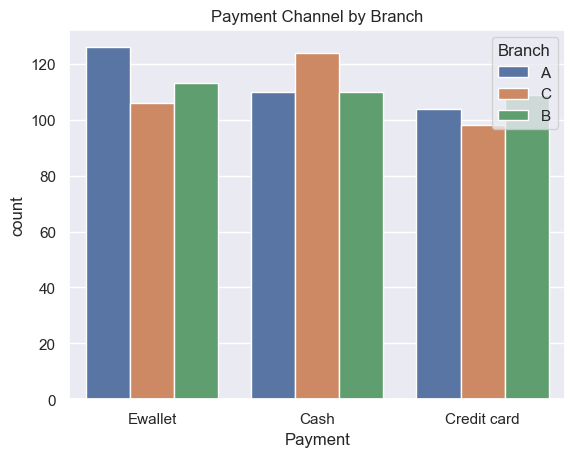

In [33]:
sns.countplot(x="Payment", hue = "Branch", 
              data =sales).set_title("Payment Channel by Branch") 

## Customer membership

Text(0.5, 1.0, 'Customer Type by Branch')

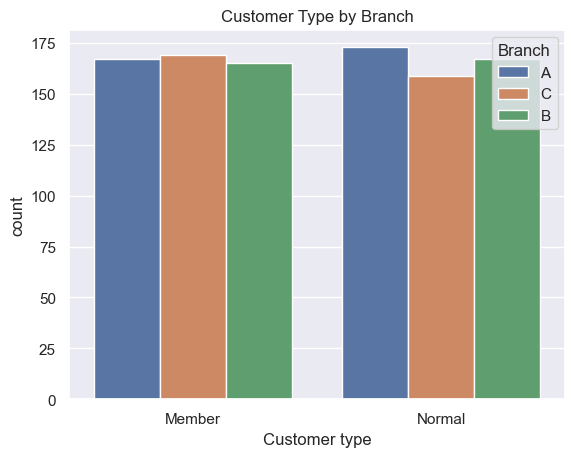

In [34]:
sns.countplot(x="Customer type", hue = "Branch", 
              data =sales).set_title("Customer Type by Branch") 

<Axes: xlabel='Customer type', ylabel='Total'>

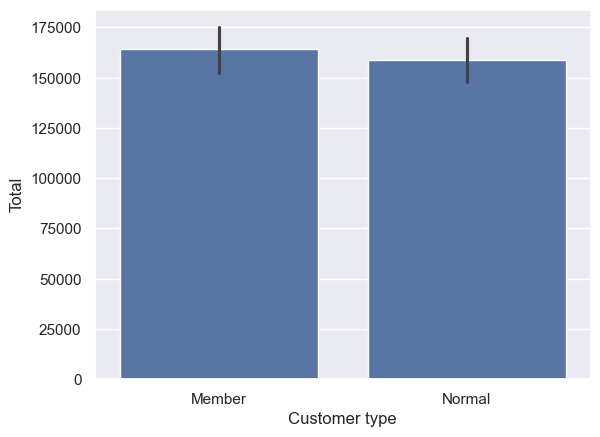

In [35]:
sns.barplot(x="Customer type", y="Total", estimator = sum, data=sales)

## Sales amount on membership

In [36]:
sales.groupby(['Customer type']).agg({'Total': 'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


## Do the customer type influence customer rating?

<Axes: xlabel='Rating', ylabel='Product line'>

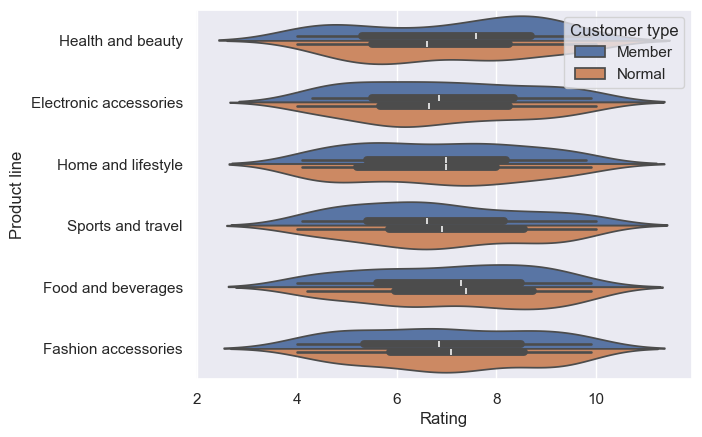

In [37]:
sns.violinplot(data=sales, y = 'Product line', x = 'Rating',
                hue = 'Customer type',split=True)

In [38]:
# Member's average rating
sales['Rating'].loc[sales['Customer type']=='Member'].mean()

6.940319361277445

In [39]:
# Non-Member's average rating
sales['Rating'].loc[sales['Customer type']=='Normal'].mean()

7.005210420841683

## Quantity vs Total sales

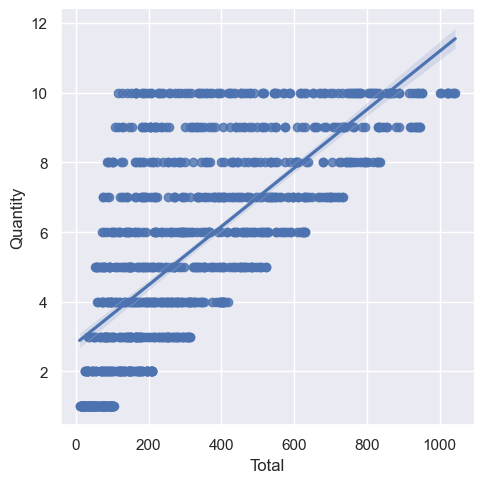

In [40]:
sns.lmplot(x="Total",  y = "Quantity", data =sales)